In [1]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.reuters.com/companies/THYAO.IS/news'

response = requests.get(url, timeout=10)
url_content = BeautifulSoup(response.content, 'html.parser')

In [2]:
news_divs = url_content.find_all('div', attrs={'class':"item"})

news_heads = []

for i in range(len(news_divs)):
    
    news_heads.append(news_divs[i].a.get_text())
    


In [7]:
import pandas as pd

df = pd.DataFrame(news_heads)

df.columns = ['news']

df.head()

,news
0,Turkish Airlines sees moderate increase in pas...
1,Turkish Airlines says reaches compensation dea...
2,"Turkish Airlines, Boeing reach 737 Max aircraf..."
3,Turkish Airlines prepping case against Boeing ...
4,UPDATE 1-Turkish Airlines' quarterly loss more...


In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

scores = []
vader = SentimentIntensityAnalyzer()
for head in news_heads:
    score = vader.polarity_scores(head)
    scores.append(score)

scores

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kaganyesilova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.0516},
 {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.0258},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.128},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, '

In [11]:
df_s = pd.DataFrame(scores)

df_s.head()

,compound,neg,neu,pos
0,0.3182,0.000,0.796,0.204
1,0.0516,0.000,0.882,0.118
2,0.0258,0.000,0.879,0.121
3,0.0000,0.000,1.000,0.000
4,-0.3182,0.187,0.813,0.000


In [12]:
df = df.join(df_s)

df.head()

,news,compound,neg,neu,pos
0,Turkish Airlines sees moderate increase in pas...,0.3182,0.000,0.796,0.204
1,Turkish Airlines says reaches compensation dea...,0.0516,0.000,0.882,0.118
2,"Turkish Airlines, Boeing reach 737 Max aircraf...",0.0258,0.000,0.879,0.121
3,Turkish Airlines prepping case against Boeing ...,0.0000,0.000,1.000,0.000
4,UPDATE 1-Turkish Airlines' quarterly loss more...,-0.3182,0.187,0.813,0.000


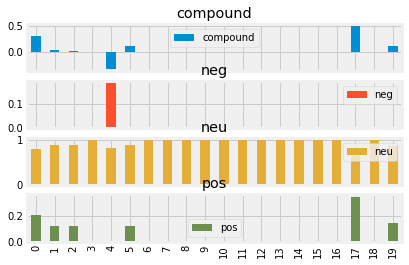

In [13]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

df.plot.bar(subplots=True)

plt.show()

In [14]:
df

,news,compound,neg,neu,pos
0,Turkish Airlines sees moderate increase in pas...,0.3182,0.000,0.796,0.204
1,Turkish Airlines says reaches compensation dea...,0.0516,0.000,0.882,0.118
2,"Turkish Airlines, Boeing reach 737 Max aircraf...",0.0258,0.000,0.879,0.121
3,Turkish Airlines prepping case against Boeing ...,0.0000,0.000,1.000,0.000
4,UPDATE 1-Turkish Airlines' quarterly loss more...,-0.3182,0.187,0.813,0.000
5,Exclusive: Istanbul airport consortium does no...,0.1280,0.000,0.880,0.120
6,Lviv airport in Ukraine delays flights due to ...,0.0000,0.000,1.000,0.000
7,"Turkish airline, telecoms firm to halt U.S. ad...",0.0000,0.000,1.000,0.000
8,"UPDATE 1-Turkish Airlines eyes airport stake, ...",0.0000,0.000,1.000,0.000
9,Turkish Airlines in talks to finance facilitie...,0.0000,0.000,1.000,0.000


In [18]:
for i in range(len(df)):
    print(df.iloc[i, 0])

Turkish Airlines sees moderate increase in passenger numbers in 2020
Turkish Airlines says reaches compensation deal over Boeing 737 MAX
Turkish Airlines, Boeing reach 737 Max aircraft compensation deal
Turkish Airlines prepping case against Boeing over 737 MAX: news agency
UPDATE 1-Turkish Airlines' quarterly loss more than doubles on higher costs
Exclusive: Istanbul airport consortium does not need new financing or partners - Limak
Lviv airport in Ukraine delays flights due to incident
Turkish airline, telecoms firm to halt U.S. advertising
UPDATE 1-Turkish Airlines eyes airport stake, CEO says
Turkish Airlines in talks to finance facilities at new Istanbul airport: sources
Turkish Airlines in talks to finance facilities at new Istanbul airport -sources
Turkish Airlines to form venture with ZTO Express and Pal Air
Turkish Airlines chooses GE Aviation engines for new planes
BRIEF-Boeing & Turkish Airlines Finalize Deal For Up To 30 787 Dreamliners
BRIEF-Turkish Airlines To Purchase To